In [2]:
from keras.applications.vgg16 import VGG16
model = VGG16()


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
from keras.utils import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
import cv2
image = load_img('dog.jpeg',target_size=(224,224))
image = np.array(image)
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
image = preprocess_input(image)
image
my_image = cv2.imread('dog.jpeg')


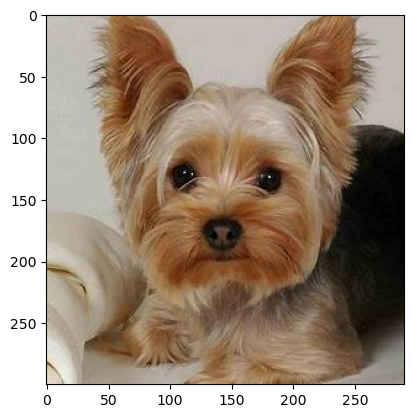

In [5]:
from matplotlib import pyplot as plt
my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2RGB)
plt.imshow(my_image)

In [6]:
from keras.applications.vgg16 import preprocess_input, decode_predictions
yhat = model.predict(image)
label = decode_predictions(yhat)
label

1/1 [==============================] - 3s 3s/step


[[('n02094433', 'Yorkshire_terrier', 0.9599559),
  ('n02096294', 'Australian_terrier', 0.016696451),
  ('n02097658', 'silky_terrier', 0.013871724),
  ('n02094114', 'Norfolk_terrier', 0.004175216),
  ('n02087046', 'toy_terrier', 0.0010187156)]]

In [7]:
#!pip install keras_applications


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from __future__ import print_function
import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.utils import get_source_inputs
import tensorflow as tf
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [2]:
def VGGupdated(input_tensor=None,classes=10):
    img_rows, img_cols = 300,300
    img_channels = 3
    img_dim = (img_rows,img_cols,img_channels)
    img_input = Input(shape=img_dim)

    #Block 1
    x = Conv2D(64,(3,3),activation='relu',padding='same',name='block1_conv1')(img_input)
    x = Conv2D(64,(3,3),activation='relu',padding='same',name='block1_conv2')(x)
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),name='block1_pool')(x)
    
    #Block 2
    x = Conv2D(128,(3,3),activation='relu',padding='same',name='block2_conv1')(x)
    x = Conv2D(128,(3,3),activation='relu',padding='same',name='block2_conv2')(x)
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),name='block2_pool')(x)

    #Block 3
    x = Conv2D(256,(3,3),activation='relu',padding='same',name='block3_conv1')(x)
    x = Conv2D(256,(3,3),activation='relu',padding='same',name='block3_conv2')(x)
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),name='block3_pool')(x)

    #Block 4
    x = Conv2D(512,(3,3),activation='relu',padding='same',name='block4_conv1')(x)
    x = Conv2D(512,(3,3),activation='relu',padding='same',name='block4_conv2')(x)
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),name='block4_pool')(x)

    #Block 5
    x = Conv2D(512,(3,3),activation='relu',padding='same',name='block5_conv1')(x)
    x = Conv2D(512,(3,3),activation='relu',padding='same',name='block5_conv2')(x)
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),name='block5_pool')(x)

    x = Flatten(name='flatten')(x)

    #fully connected layer
    x = Dense(4096,activation='relu',name='fc1')(x)
    x = Dense(4096,activation='relu',name='fc2')(x)
    x = Dense(classes,activation='softmax',name='predictions')(x)

    #create model 
    model = Model(inputs=img_input,outputs=x,name='VGGdemo')

    return model


In [16]:
with tf.device('/CPU:0'):
    #for model
    model = VGGupdated(classes=7)
    model.summary()
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    

Model: "VGGdemo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [19]:
import cv2
with tf.device('/CPU:0'):
    #for input images
    datapath_path = os.listdir('cars/')
    print(datapath_path)
    images = []
    labels = []
    for item in datapath_path:
        path = 'cars/'+str(item)
        files = [i for i in os.listdir(path)]
        for f in files:
            img = cv2.imread(path+'/'+f)
            img = cv2.resize(img,(300,300))
            images.append(img)
            labels.append(item)
    images = np.array(images)
    images = images.astype('float32')/255
    images.shape
    
    #y = np.reshape(y,(-1,1))
    #y_one_encoder = OneHotEncoder()
    #Y = y_one_encoder.fit_transform(y)
    #Y.shape

    

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [17]:
#for labels
y_label_encoder = LabelEncoder()
y = y_label_encoder.fit_transform(labels)
y = y.reshape(-1,1)

print(y)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (3327, 6)	1.0
  (3328, 6)	1.0
  (3329, 6)	1.0
  (3330, 6)	1.0
  (3331, 6)	1.0
  (3332, 6)	1.0
  (3333, 6)	1.0
  (3334, 6)	1.0
  (3335, 6)	1.0
  (3336, 6)	1.0
  (3337, 6)	1.0
  (3338, 6)	1.0
  (3339, 6)	1.0
  (3340, 6)	1.0
  (3341, 6)	1.0
  (3342, 6)	1.0
  (3343, 6)	1.0
  (3344, 6)	1.0
  (3345, 6)	1.0
  (3346, 6)	1.0
  (3347, 6)	1.0
  (3348, 6)	1.0
  (3349, 6)	1.0
  (3350, 6)	1.0
  (3351, 6)	1.0


In [7]:
#train and test set
images,y = shuffle(images,y,random_state=1)
train_x,test_x,train_y,test_y = train_test_split(images,y,test_size=0.2,random_state=415)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2681, 300, 300, 3)
(671, 300, 300, 3)
(2681, 1)
(671, 1)


In [8]:
#tf.debugging.set_log_device_placement(True)
#train_x = train_x.to_array
#train_y = train_y.to_array
with tf.device('/GPU:0'):
    model.fit(train_x,train_y,epochs=10,batch_size=16)

Epoch 1/10
168/168 [==============================] - 77s 382ms/step - loss: 2.2382 - accuracy: 0.2372
Epoch 2/10
168/168 [==============================] - 60s 355ms/step - loss: 1.8609 - accuracy: 0.2436
Epoch 3/10
168/168 [==============================] - 60s 360ms/step - loss: 1.8624 - accuracy: 0.2327
Epoch 4/10
168/168 [==============================] - 62s 368ms/step - loss: 1.8606 - accuracy: 0.2260
Epoch 5/10
168/168 [==============================] - 60s 356ms/step - loss: 1.8570 - accuracy: 0.2465
Epoch 6/10
168/168 [==============================] - 60s 355ms/step - loss: 1.8588 - accuracy: 0.2372
Epoch 7/10
168/168 [==============================] - 60s 356ms/step - loss: 1.8578 - accuracy: 0.2436
Epoch 8/10
168/168 [==============================] - 60s 356ms/step - loss: 1.8577 - accuracy: 0.2417
Epoch 9/10
168/168 [==============================] - 59s 354ms/step - loss: 1.8585 - accuracy: 0.2335
Epoch 10/10
168/168 [==============================] - 60s 354ms/step - l

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     